In [ ]:
# Importing the Required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading in the dataset
df = pd.read_csv("Dejo Osejoro - placementdata.csv")
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [ ]:
# SSC Mark - Secondary School Certificate Mark
# HSC Mark - Higher School Certificate Mark

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
#Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking for null values
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [ ]:
#Statistical Summary
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
StudentID,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CGPA,10000.0,NaN,NaN,NaN,7.69801,0.640131,6.5,7.4,7.7,8.2,9.1
Internships,10000.0,NaN,NaN,NaN,1.0492,0.665901,0.0,1.0,1.0,1.0,2.0
Projects,10000.0,NaN,NaN,NaN,2.0266,0.867968,0.0,1.0,2.0,3.0,3.0
Workshops/Certifications,10000.0,NaN,NaN,NaN,1.0132,0.904272,0.0,0.0,1.0,2.0,3.0
AptitudeTestScore,10000.0,NaN,NaN,NaN,79.4499,8.159997,60.0,73.0,80.0,87.0,90.0
SoftSkillsRating,10000.0,NaN,NaN,NaN,4.32396,0.411622,3.0,4.0,4.4,4.7,4.8
ExtracurricularActivities,10000,2,Yes,5854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlacementTraining,10000,2,Yes,7318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSC_Marks,10000.0,NaN,NaN,NaN,69.1594,10.430459,55.0,59.0,70.0,78.0,90.0


In [ ]:
# Defining features and target
X= df.drop(columns = ["PlacementStatus","StudentID"])
y = df["PlacementStatus"]

In [ ]:
#Creating a Categorical and Numerical List
categorical_list = []
numerical_list = []

for col in X.columns:
  if X[col].dtypes == "object":
    X[col] = X[col].astype('category')
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [ ]:
print(categorical_list)

['ExtracurricularActivities', 'PlacementTraining']


In [ ]:
print(numerical_list)

['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']


In [ ]:
# Creating Pipelines for the features(That takes in preprocessing steps)
numerical_pipeline = Pipeline(steps = [('scale', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('encoding', OneHotEncoder())])

In [ ]:
# Creating a preprocessor i.e the column transformer which executes the previous pipelines on the respective columns.
column_transform = ColumnTransformer(transformers = [
    ('numerical_transform', numerical_pipeline, numerical_list),
    ('categorical_transform', categorical_pipeline, categorical_list)
],
                                     remainder='drop',
                                     n_jobs = -1)

In [ ]:
# Spliting my dataset into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
# Creating a Dictionary that holds 4 classifier models to be used for the purpose of comparision
models = {
    "Logistic Regressor": LogisticRegression(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth = 5, random_state = 42),
    "SVM": SVC()
}
# Creating a pipeline for each  model in the `models` dictionary by iteration.
pipelines = {name :Pipeline(steps =[("preprocessor", column_transform),
                                    ("classifier",model)])
            for name, model in models.items()}

In [ ]:
results = {}
# Iterating over the different model pipelines to find the best one by calculating the average accuracy score from 5 cross validations
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline,X_train,y_train, cv=5,scoring = "accuracy")
    results[name] = scores.mean()

for model, score in results.items():
    print(f"{model}: {score:.4f}")

Logistic Regressor: 0.7994
Random Forest: 0.7886
Decision Tree: 0.7869
SVM: 0.7968


In [ ]:
#Initializing My Grid Search for the Logistic Regression Model since it came top.

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=pipelines["Logistic Regressor"],
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=1)  # Print progress during search

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numerical_transform',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['CGPA',
                                                                          'Internships',
                                                                          'Projects',
                                                                          'Workshops/Certifications',
                                                                          'AptitudeTestScore',
                                                                          'SoftSkillsRating',
                                                                          'SSC_Marks',
                                                                          'HSC_Marks']),
                                                                        ('categorical_transform',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OneHotEncoder())]),
                                                                         ['ExtracurricularActivities',
                                                                          'PlacementTraining'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             verbose=1)

In [ ]:
#This is to show the best parameters for my model
print("Best Parameters:", grid_search.best_params_)

# Best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [ ]:
# classification report from best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1172
      Placed       0.74      0.77      0.76       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



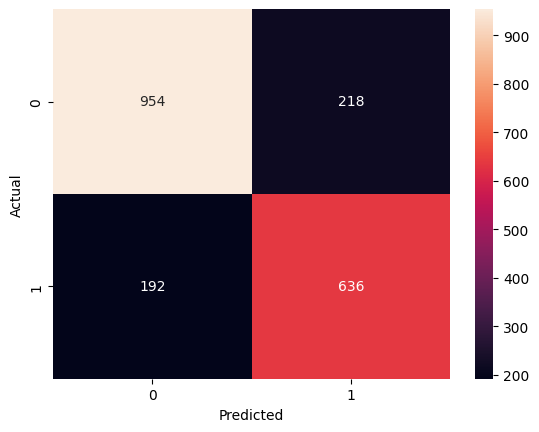

In [ ]:
# plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Retrieving my best model from the pipeline
lr_model = best_model.named_steps["classifier"]

In [ ]:
# Getting out the feature coefficients
coefficients = lr_model.coef_
coefficients

array([[ 0.24835163,  0.00485266,  0.22535162,  0.1084346 ,  0.55938708,
         0.30645757,  0.27932557,  0.28541219, -0.49674331,  0.16232289,
        -0.64147676,  0.21405098]])

In [ ]:
# I didnt notice this was 2d so when i was trying to convert to df it raised an error then i checked and solved the issue accordingly.
coefficients = coefficients.flatten()
coefficients

array([ 0.24835163,  0.00485266,  0.22535162,  0.1084346 ,  0.55938708,
        0.30645757,  0.27932557,  0.28541219, -0.49674331,  0.16232289,
       -0.64147676,  0.21405098])

In [ ]:
# Retrieving the preprocessor from the pipeline
preprocessor= best_model.named_steps["preprocessor"]

In [ ]:
#Retrieving the feature names
features_names = preprocessor.get_feature_names_out()
features_names

array(['numerical_transform__CGPA', 'numerical_transform__Internships',
       'numerical_transform__Projects',
       'numerical_transform__Workshops/Certifications',
       'numerical_transform__AptitudeTestScore',
       'numerical_transform__SoftSkillsRating',
       'numerical_transform__SSC_Marks', 'numerical_transform__HSC_Marks',
       'categorical_transform__ExtracurricularActivities_No',
       'categorical_transform__ExtracurricularActivities_Yes',
       'categorical_transform__PlacementTraining_No',
       'categorical_transform__PlacementTraining_Yes'], dtype=object)

In [ ]:
# Converting the 1-d coefficients, features array to a Dataframe for easy manipulation
ft_importance_df = pd.DataFrame({"Features":features_names,"Coefficients":coefficients})
ft_importance_df.sort_values(by = "Coefficients", inplace= True)

In [ ]:
ft_importance_df

,Features,Coefficients
10,categorical_transform__PlacementTraining_No,-0.641477
8,categorical_transform__ExtracurricularActiviti...,-0.496743
1,numerical_transform__Internships,0.004853
3,numerical_transform__Workshops/Certifications,0.108435
9,categorical_transform__ExtracurricularActiviti...,0.162323
11,categorical_transform__PlacementTraining_Yes,0.214051
2,numerical_transform__Projects,0.225352
0,numerical_transform__CGPA,0.248352
6,numerical_transform__SSC_Marks,0.279326
7,numerical_transform__HSC_Marks,0.285412


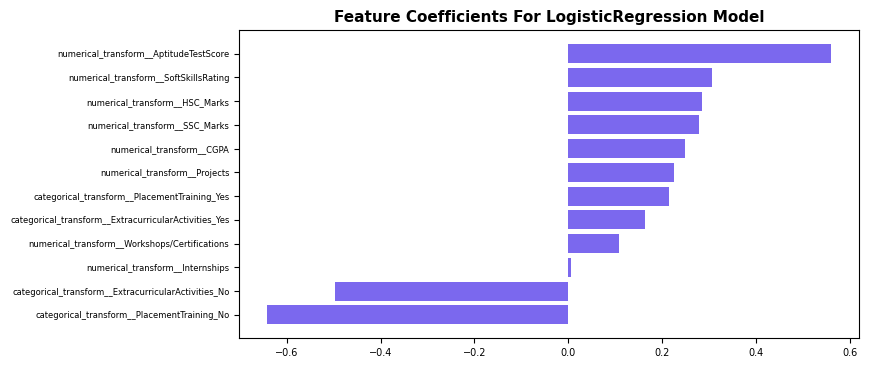

In [ ]:
#Visualizing The Feature Importance
plt.figure(figsize = (8,4))
plt.barh(ft_importance_df["Features"],ft_importance_df["Coefficients"], color = "#7b68ee")
plt.title("Feature Coefficients For LogisticRegression Model", fontsize = 11, fontweight = 550)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 6)
plt.show()

## Report

----------
1. **Which Model Performed Best and Why**: The `Logistic Regression Model` performed best. After carrying out a cross validation comparing 4 models, the LogisticRegression Model had the highest `mean accuracy score(0.7994)`.
2. **What Suprised you about the data** : Nothing much, i guess the only thing is that i had to read on some of the features e. g `HSC` and `SSC` marks since they differed from the normal grading system in Nigeria,so as to get a hang of their importance.
3. **What actionable recommendations would you prioritize** :
   - **Placement Trainings :** We Can see from the feature coefficients : Most people who had no placement training did not end up getting placed. So I'll advice that students get this training.
   -  **Aptitude Test** : This was the 2nd most important feature. *The greater your Aptitude Test Score the greater the guarantee of you getting a placement*
    - **Extra-Curricular :** Having No extracurriculars is very detrimental it immediately kinda sets you out of the bargain. Having an extracurricular validates your participation in the bragain for the placement it has to be supplemented with other performance afterwards you can be guaranteed a placement.
    - **Does it(Extra-Curriculars) compensate for low academic performance ?** No it doesn't. From the feature importance the cumulative/average contribution of the academic performance matrics (i.e `HSC`,`SSC`,`CGPA`,`AptitudeTestScore`) is far greater than what the `ExtraCurriculars` offer. *So I'll advise that student's have a moderate participation in Extracuriculars(Like a side-quest) and giver greater regard to their Studies.*
    - **CGPA: is there a Threshold ?** Candidates must have at least a `CGPA` of 6.5. This `CGPA` score is more like the jamb cut off for a university : the jamb cutoff qualifies you to apply for a Placement but doesn't necessarily guarantees it as your placement is subject to many factors. Therefore *I'll advise that anyone with the prospect of getting a placement should endeavour to get a CGPA of at least 6.5*
    - **Internships** : While interships is a nice way of spending ones time, its contribution to your chances of getting a placement could be described as irrelevant.So i would advise you put off internships and face your book (chuckle).

----------

#### Note :
**Since the LogisticRegression Model uses feature coefficients - which is a metric that sets the tune for correlation. I drew my insights from it and also some from the statistical summary.
If i may add - I dropped the `StudentID` column because it is of no use, it is just number numbering not based on time or order. Just number tags.**

----
## Thanks !